In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

dataframe = pd.read_csv('fiuba-trocafone-tp1-final-set/events.csv',low_memory=False)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

# 1. Comparación por marca

In [169]:
dataframe['marca'], dataframe['modelo'] = dataframe['model'].str.split(' ',1).str
dataframe['marca'] = dataframe['marca'].apply(lambda marca: 'Apple' if (marca == 'iPhone' or marca == 'iPad') else marca)

prod1=dataframe[dataframe['event'] == 'conversion']
conversion = prod1['marca'].value_counts()

prod2=dataframe[dataframe['event'] == 'checkout']
checkout = prod2['marca'].value_counts()
checkout

Samsung     14707
Apple       14154
Motorola     3738
LG            562
Lenovo        272
Sony          218
Asus           63
Quantum        19
Name: marca, dtype: int64

In [162]:
tabla1 = pd.concat([conversion],axis=1)
tabla1.columns = ['conversion']
tabla1['conversion_log'] = np.log(tabla1["conversion"]+1)

tabla2 = pd.concat([checkout],axis=1)
tabla2.columns = ['checkout']
tabla2['checkout_log'] = np.log(tabla2["checkout"]+1)

tabla = pd.concat([tabla2['checkout_log'],tabla1['conversion_log']],axis=1)
tabla

,checkout_log,conversion_log
Apple,9.56,5.78
Asus,4.16,1.10
LG,6.33,3.04
Lenovo,5.61,2.71
Motorola,8.23,5.01
Quantum,3.00,nan
Samsung,9.60,6.46
Sony,5.39,3.18


Text(0.5,0,'Marca')

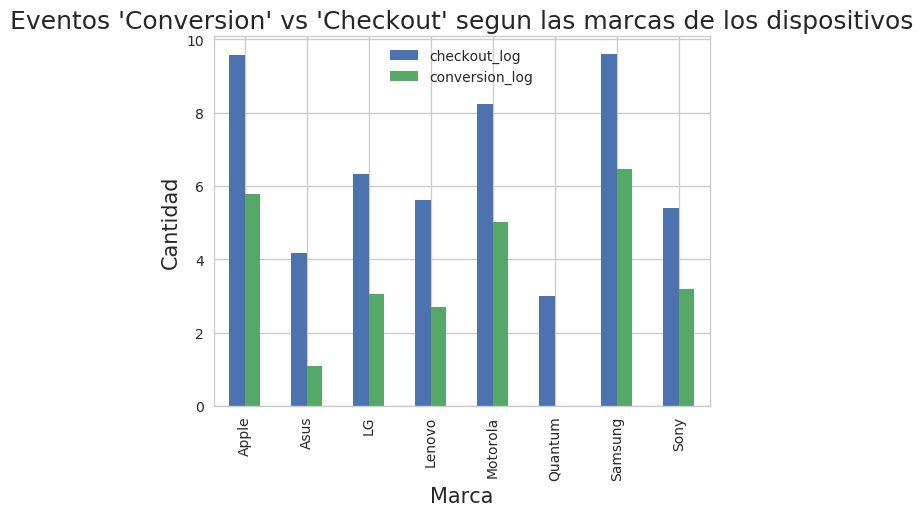

In [163]:
'''
Grafico de barras de ventas por marca de dispositivo.
'''
g = tabla.plot.bar()
g.set_title("Eventos 'Conversion' vs 'Checkout' segun las marcas de los dispositivos", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Marca", fontsize=15)

Text(0,0.5,'Marca')

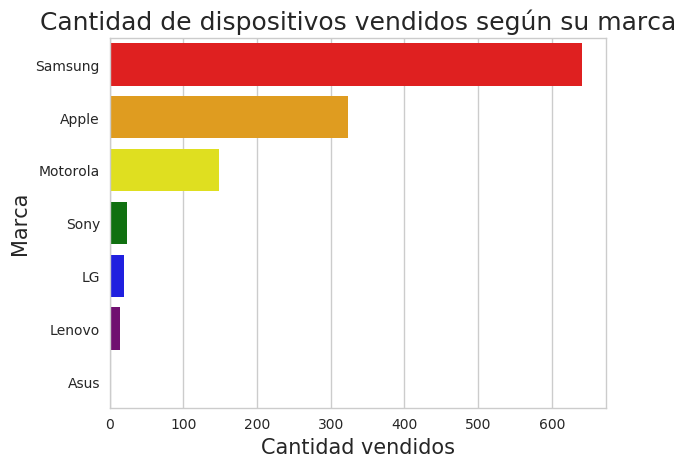

In [98]:

#Grafico de barras de ventas por marca de dispositivo.

g = sns.barplot(x=conversion.values, y=conversion.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de dispositivos vendidos según su marca", fontsize=18)
g.set_xlabel("Cantidad vendidos", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0.5,0,'Modelo')

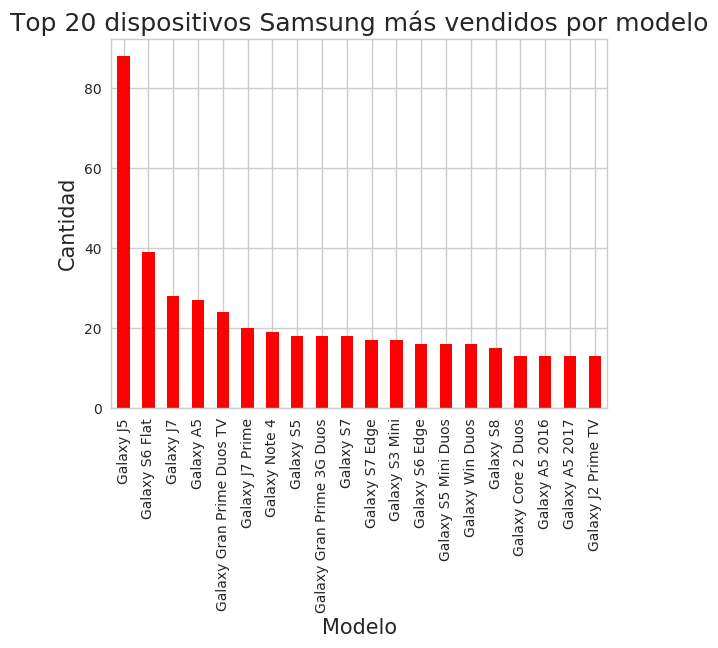

In [171]:
'''
Grafico de barras de top 20 dispositivos Samsung mas vendidos.

Se ve que los celulares Samsung mas vendidos no son los mas nuevos, sino que son
celulares que fueron lanzados al mercado hace 3 años aprox.
Esto demuestra que los usuarios tienen tendencias a comprar dispositivos que no estan discontinuados
pero que por otro lado ya han sido sucedidos por varios modelos nuevos
'''
SamsungVendidos = prod1.loc[prod1.marca == 'Samsung',:]['modelo'].value_counts().head(20)
SamsungVendidos

g = SamsungVendidos.plot.bar(color=['red'])
g.set_title("Top 20 dispositivos Samsung más vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,0,'Modelo')

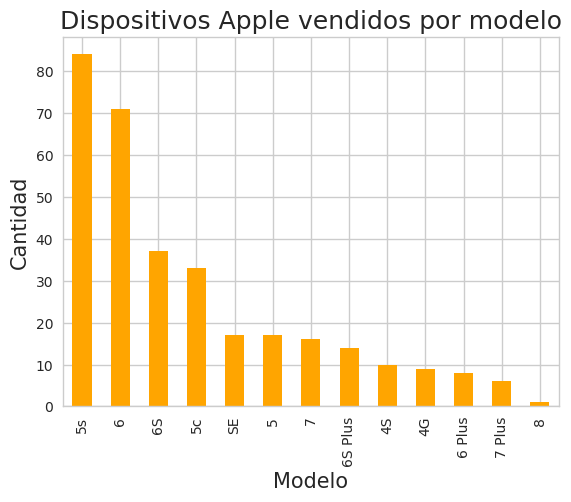

In [137]:
'''
Grafico de barras de dispositivos Apple mas vendidos.

A diferencia de Samsung, aqui se ve que los 2 modelos mas vendidos son modelos que salieron
entre 4 y 5 años atras.
Esto muestra algo similar a lo sucedido con Samsung, demostrando que los dispositivos de Apple mas nuevos
suelen ser muy caros y por lo que la gente que recurre a la pagina esta mas interesada en celulares viejos
pero que todavia estan funcionales
'''

AppleVendidos = prod1.loc[prod1.marca == 'Apple',:]['modelo'].value_counts()
AppleVendidos

g = AppleVendidos.plot.bar(color=['orange'])
g.set_title("Dispositivos Apple vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,0,'Modelo')

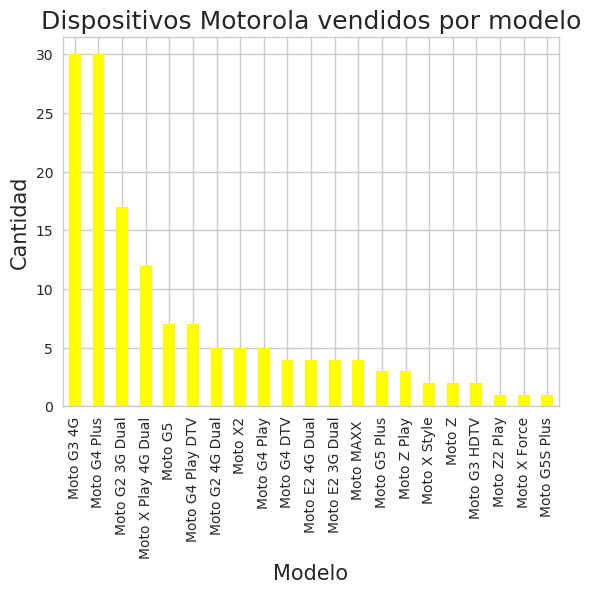

In [172]:
'''
Grafico de barras de dispositivos Motorola mas vendidos.
'''
MotorolaVendidos = prod1.loc[prod1.marca == 'Motorola',:]['modelo'].value_counts()
MotorolaVendidos

g = MotorolaVendidos.plot.bar(color=['yellow'])
g.set_title("Dispositivos Motorola vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

# 2. Comparación por fecha

In [166]:
'''
Agrego las columnas año, mes y dia.
'''
dataframe['año'],dataframe['mes'],dataframe['dia']= dataframe['timestamp'].str.split(' ').str[0].str.split('-').str

In [11]:
dataframe['actividad'] = 1
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='actividad', aggfunc='sum')

Text(52.7222,0.5,'Mes')

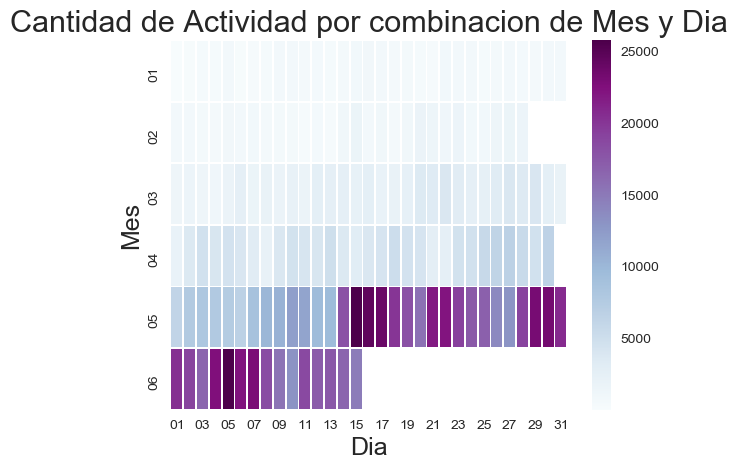

In [12]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Cantidad de Actividad por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

In [92]:
dataframe['compra'] = dataframe['event']=='conversion'
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='compra', aggfunc='sum')

Text(50.7222,0.5,'Mes')

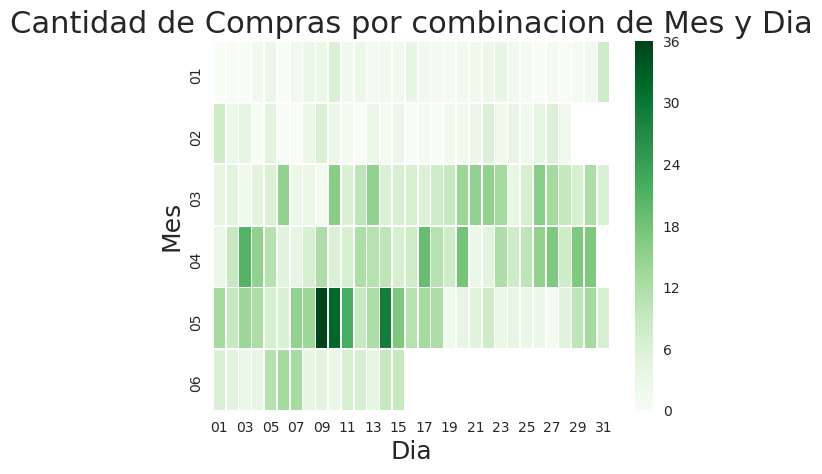

In [93]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="Greens") # annot=True
g.set_title("Cantidad de Compras por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

In [167]:
dataframe['checkout'] = dataframe['event']=='checkout'
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='checkout', aggfunc='sum')
dataframe['checkout']

0          False
1          False
2          False
3           True
4          False
5          False
6          False
7           True
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1011258    False
1011259    False
1011260    False
1011261    False
1011262    False
1011263    False
1011264    False
1011265    False
1011266    False
1011267    False
1011268    False
1011269    False
1011270    False
1011271    False
1011272    False
1011273    False
1011274    False
1011275    False
1011276    False
1011277    False
1011278    False
1011279    False
1011280    False
1011281    False
1011282    False
1011283     True
1011284    False
1011285    Fal

Text(50.7222,0.5,'Mes')

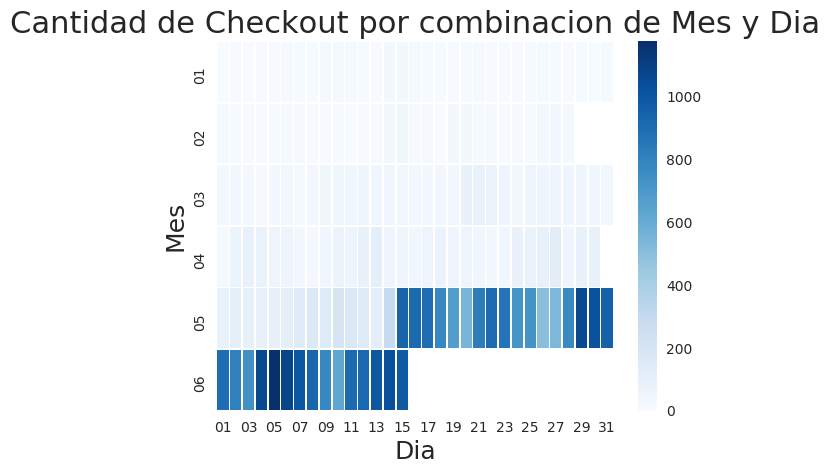

In [95]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="Blues") # annot=True
g.set_title("Cantidad de Checkout por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

In [15]:
dataframe['conversion'] = dataframe['event']=='conversion'
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='conversion', aggfunc='sum')

Text(52.7222,0.5,'Mes')

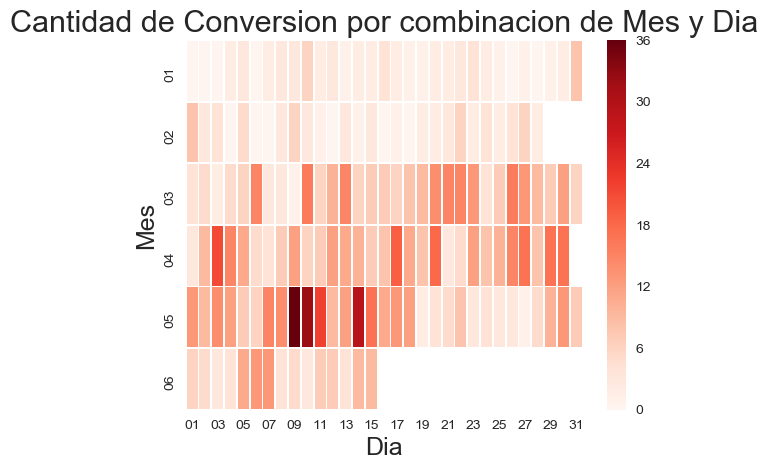

In [21]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="Reds") # annot=True
g.set_title("Cantidad de Conversion por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

# 3. Comparación por ubicación

In [126]:
dataframe['pais'] = dataframe['country'].dropna().apply(lambda country: 'Other' if (country != 'Brazil') else country)

In [127]:
ingresoPorPais = dataframe.loc[dataframe['event'] == 'visited site'].filter(items = ['pais','event']).groupby('pais').count()
ingresoPorPais = ingresoPorPais.loc[ingresoPorPais['event'] > 10]['event']
ingresoPorPais

pais
Brazil    84308
Other      3070
Name: event, dtype: int64

Text(0,0.5,'')

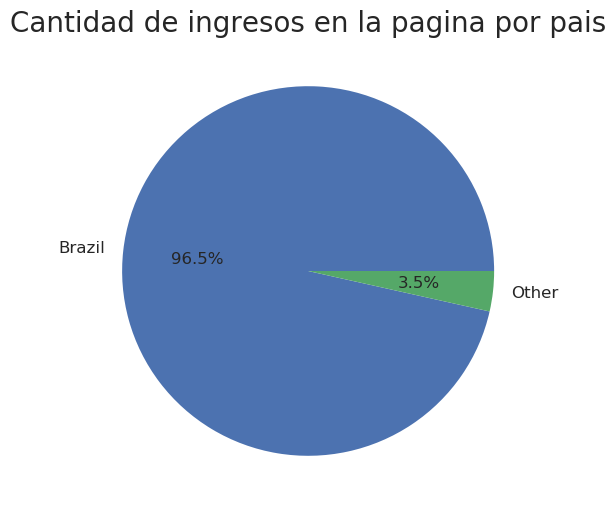

In [94]:
'''
Grafico pie de eventos en la pagina por pais.
Se ve que supera por gran distancia Brasil en cuanto a lo que es visitar la pagina, por lo
que se entiende que tiene una gran repercusion local
'''

g = ingresoPorPais.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),fontsize=12)
g.set_title("Cantidad de ingresos en la pagina por pais",fontsize=20)
g.set_ylabel("")

In [136]:
#Discriminando las actividades en la pagina que fueron originadas en Brasil, vemos que repercusion tiene
#internacionalmente la pagina
dataframe.loc[dataframe['country']!='Brazil',:]['country'].value_counts()

Unknown               2313
United States          465
Argentina               94
Canada                  35
France                  13
Netherlands             13
United Kingdom          12
Mozambique              12
Japan                   11
Poland                   9
French Guiana            8
Romania                  7
Portugal                 7
Italy                    7
Dominican Republic       6
Russia                   6
Guadeloupe               6
Germany                  5
Colombia                 4
Paraguay                 4
Bangladesh               4
Switzerland              3
Morocco                  2
Angola                   2
India                    2
Peru                     1
Mexico                   1
Israel                   1
Ireland                  1
Denmark                  1
Turkey                   1
South Africa             1
Spain                    1
Algeria                  1
Zimbabwe                 1
Rwanda                   1
Saudi Arabia             1
P

Sao Paulo              24996
Unknown                12378
Minas Gerais            7755
Rio de Janeiro          6913
Bahia                   5737
Pernambuco              2962
Ceara                   2829
Parana                  2602
Rio Grande do Sul       2576
Federal District        1739
Goias                   1564
Santa Catarina          1511
Para                    1382
Maranhao                1303
Espirito Santo          1257
Rio Grande do Norte     1064
Paraíba                  875
Piaui                    824
Alagoas                  751
Mato Grosso do Sul       618
Amazonas                 600
Tocantins                596
Mato Grosso              487
Sergipe                  405
Rondonia                 273
Amapa                    148
Acre                      96
Roraima                   67
Name: region, dtype: int64

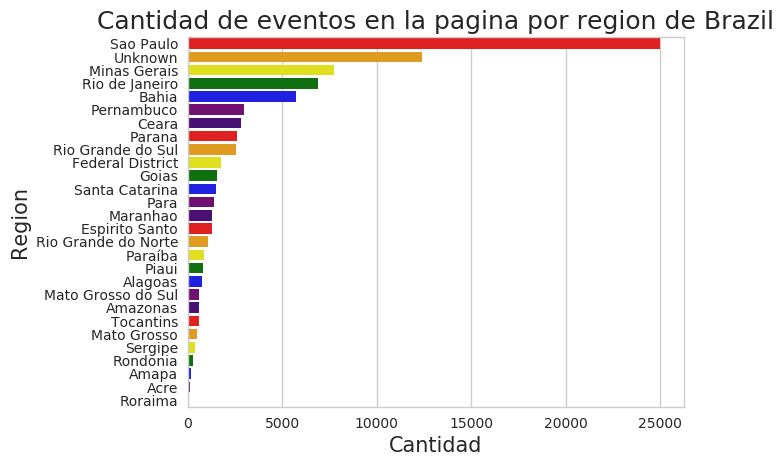

In [100]:
'''
Grafico de barras de cantidad de eventos en la pagina por region en Brazil.
'''
ingresoPorRegionEnBrazil = dataframe.filter(items = ['country','region','event']).loc[dataframe['country'] == 'Brazil']['region'].value_counts()

g = sns.barplot(x=ingresoPorRegionEnBrazil.values, y=ingresoPorRegionEnBrazil.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de eventos en la pagina por region de Brazil", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Region", fontsize=15)

ingresoPorRegionEnBrazil

# 4. Comparación por ad campaign

Text(0,0.5,'Ad')

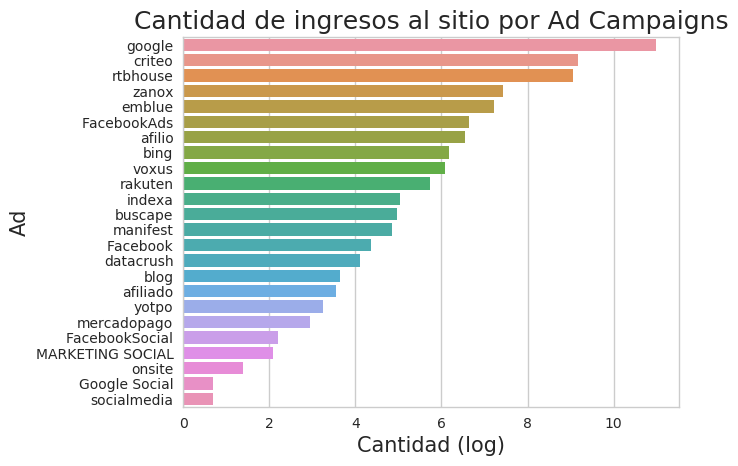

In [5]:
'''
Grafico de barras de la cantidad de ingresos al sitio por Ad Campaigns.
'''
ingresosPorAd = dataframe.loc[dataframe['event'] == 'ad campaign hit']['campaign_source'].value_counts()
ingresosPorAd_log= np.log(ingresosPorAd+1)
g = sns.barplot(x=ingresosPorAd_log.values, y=ingresosPorAd.index, orient='h')
g.set_title("Cantidad de ingresos al sitio por Ad Campaigns", fontsize=18)
g.set_xlabel("Cantidad (log)", fontsize=15)
g.set_ylabel("Ad", fontsize=15)

Text(0,0.5,'Marca')

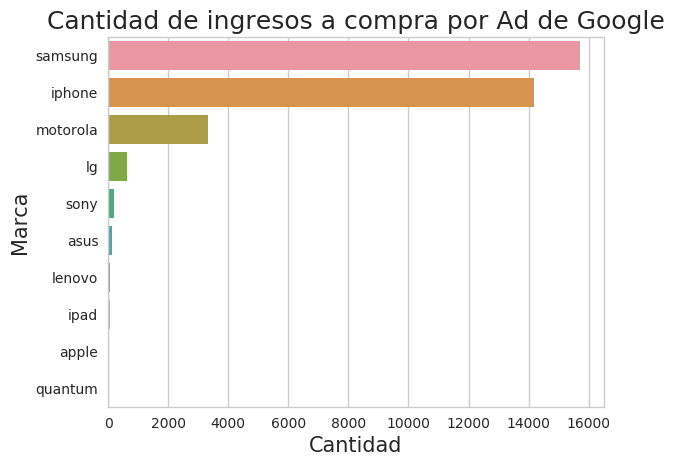

In [101]:
'''
Grafico de barras de la cantidad de ingresos a compra por Ad Campaigns de Google.
'''
ingresosCompraPorAdDeGoogle = dataframe.loc[dataframe['campaign_source'] == 'google']['url'].dropna().apply(lambda url: (str(url).split('/')[2]) if (str(url).split('/')[1] == 'comprar') else None).value_counts()

g = sns.barplot(x=ingresosCompraPorAdDeGoogle.values, y=ingresosCompraPorAdDeGoogle.index, orient='h')
g.set_title("Cantidad de ingresos a compra por Ad de Google", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0,0.5,'Marca')

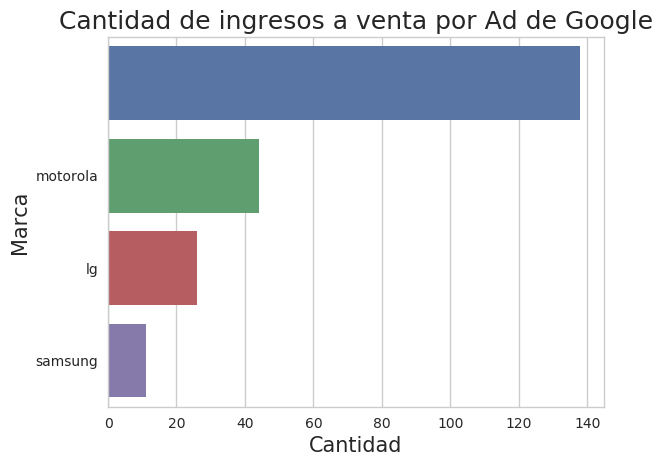

In [102]:
'''
Grafico de barras de la cantidad de ingresos a venta por Ad Campaigns de Google.
'''
ing = dataframe[dataframe['campaign_source'] == 'google']
ingresosVentaPorAdDeGoogle = ing['url'].dropna().apply(lambda url: (str(url).split('/')[2]) if (str(url).split('/')[1] == 'vender' and len(str(url).split('/'))>=3) else None).value_counts()

g = sns.barplot(x=ingresosVentaPorAdDeGoogle.values, y=ingresosVentaPorAdDeGoogle.index, orient='h')
g.set_title("Cantidad de ingresos a venta por Ad de Google", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

In [123]:
dataframe.groupby('new_vs_returning')['event'].value_counts()

new_vs_returning  event       
New               visited site    26898
Returning         visited site    60480
Name: event, dtype: int64

# 5. Clasificacion de celulares por apariencia

Text(0.5,1,'5 colores de los celulares Apple con mas actividad en la pagina')

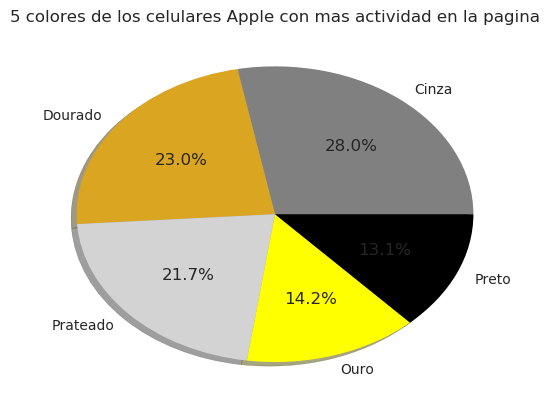

In [173]:
'''
Devuelven listas con los colores mas comprados por marca.
La idea es armar un grafico con los celulares y sus colores.
'''

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Samsung'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresSamsung = dataframe['color general'].value_counts().head(5)

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Apple'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresApple = dataframe['color general'].value_counts().head(5)

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Motorola'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresMotorola = dataframe['color general'].value_counts().head(5)

g1=plt.pie(top5ColoresApple,colors=['grey','goldenrod','lightgrey','yellow','black'],labels=top5ColoresApple.index,shadow=True,autopct='%1.1f%%')
plt.title('5 colores de los celulares Apple con mas actividad en la pagina')

Text(0.5,1,'5 colores de los celulares Motorola con mas actividad en la pagina')

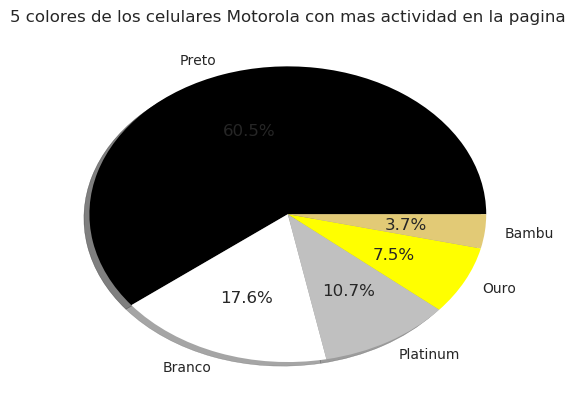

In [177]:
g1=plt.pie(top5ColoresMotorola,colors=['black','white','silver','yellow','xkcd:sand'],labels=top5ColoresMotorola.index,shadow=True,autopct='%1.1f%%')
plt.title('5 colores de los celulares Motorola con mas actividad en la pagina')

Text(0.5,1,'5 colores de los celulares Samsung con mas actividad en la pagina')

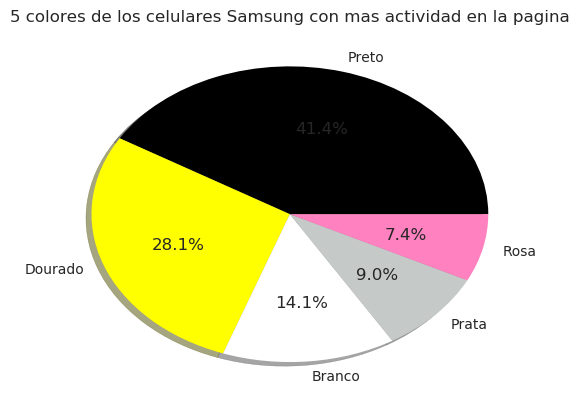

In [178]:
g1=plt.pie(top5ColoresSamsung,colors=['black','yellow','white','xkcd:silver','xkcd:pink'],labels=top5ColoresSamsung.index,shadow=True,autopct='%1.1f%%')
plt.title('5 colores de los celulares Samsung con mas actividad en la pagina')

In [72]:
#color mas vendido
coloresVendidos=dataframe[dataframe['event']=='conversion'].loc[:,'color'].value_counts()
coloresVendidos

Preto              368
Dourado            269
Branco             216
Cinza espacial      89
Prateado            51
Ouro Rosa           32
Rosa                30
Cinza               23
Azul                22
Preto Vermelho      11
Prata                8
Platinum             7
Branco Vermelho      6
Preto Matte          6
Verde                5
Titânio              4
Ouro                 4
Ametista             4
Preto Brilhante      3
Indigo               3
Bambu                2
Cabernet             2
Vermelho             2
Amarelo              2
Preto Azul           1
Couro Vintage        1
Azul Topázio         1
Name: color, dtype: int64

In [85]:
color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] == 'Samsung')&(dataframe['event']=='conversion'),:]
color_preto_sam=len(color_preto)
color_preto_sam

color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] == 'Motorola')&(dataframe['event']=='conversion'),:]
color_preto_moto=len(color_preto)
color_preto_moto

color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] == 'Apple')&(dataframe['event']=='conversion'),:]
color_preto_app=len(color_preto)
color_preto_app

color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] != 'Apple')& (dataframe['marca'] != 'Samsung')&(dataframe['marca'] != 'Motorola')&(dataframe['event']=='conversion'),:]
color_preto_others=len(color_preto)
color_preto_others

cantidadPorModelo=[color_preto_app,color_preto_moto,color_preto_sam,color_preto_others]
cantidadPorModeloIndex=['Apple','Motorola','Samsung','Otros']

Text(0,0.5,'Cantidad')

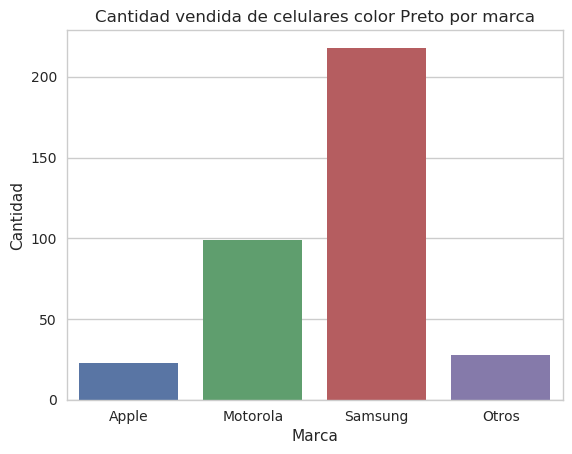

In [101]:
g=sns.barplot(x=cantidadPorModeloIndex,y=cantidadPorModelo)
g.set_title('Cantidad vendida de celulares color Preto por marca')
g.set_xlabel('Marca')
g.set_ylabel('Cantidad')

Text(0.5,1,'Cantidad de conversiones con respecto a la condicion del producto')

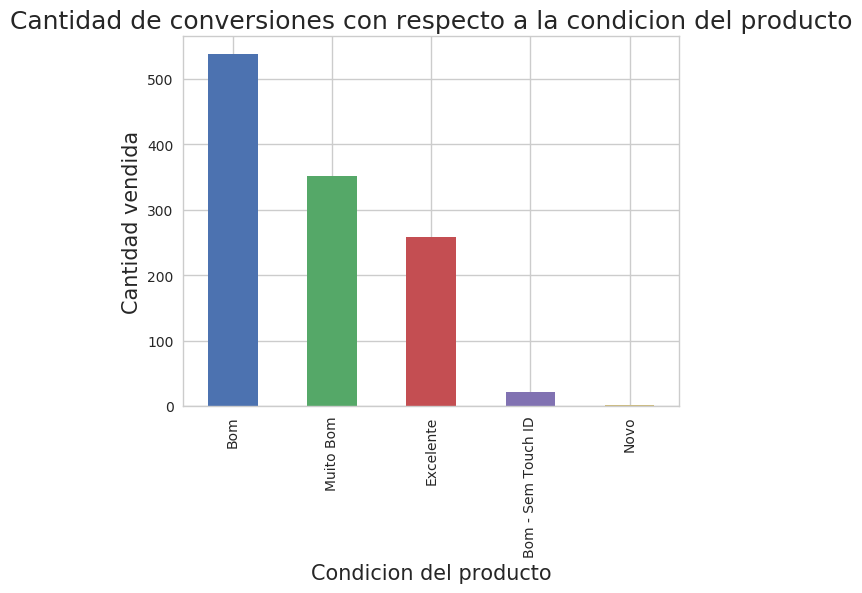

In [181]:
#Estudio de ventas con respecto a la condicion del producto
conversiones=dataframe[dataframe['event'] == 'conversion']
condicionDeConversiones=conversiones['condition'].value_counts()
g=condicionDeConversiones.plot.bar()
g.set_xlabel('Condicion del producto',fontsize=15)
g.set_ylabel('Cantidad vendida',fontsize=15)
g.set_title('Cantidad de conversiones con respecto a la condicion del producto', fontsize=18)

In [215]:
#Estudio de ventas con respecto a la condicion del producto
conversiones=dataframe[dataframe['event'] == 'conversion']
condition_per_brand=conversiones.groupby(['marca','condition']).count()
conv=condition_per_brand['event'].to_frame()
conv.columns=['cantidad de conversiones']
conv

cantidad de conversiones
marca    condition                                   
Apple    Bom                                      132
         Bom - Sem Touch ID                        22
         Excelente                                 77
         Muito Bom                                 92
Asus     Bom                                        1
         Excelente                                  1
LG       Bom                                       10
         Excelente                                  6
         Muito Bom                                  4
Lenovo   Bom                                        8
         Excelente                                  6
Motorola Bom                                       61
         Excelente                                 39
         Muito Bom                                 49
Samsung  Bom                                      324
         Excelente                                126
         Muito Bom                                189
         Novo                                       2
Sony     Bom                                        2
         Excelente                                  3
         Muito Bom                                 18

In [255]:
#Reseteo el indice para trabajar mas facil y poder hacer un stack bar plot
conv.reset_index(inplace=True)
conv

,index,marca,condition,cantidad de conversiones
0,0,Apple,Bom,132
1,1,Apple,Bom - Sem Touch ID,22
2,2,Apple,Excelente,77
3,3,Apple,Muito Bom,92
4,4,Asus,Bom,1
5,5,Asus,Excelente,1
6,6,LG,Bom,10
7,7,LG,Excelente,6
8,8,LG,Muito Bom,4
9,9,Lenovo,Bom,8


In [272]:
conv.loc[(conv['marca']=='Apple') & (conv['condition']!='Bom - Sem Touch ID'), :]

,index,marca,condition,cantidad de conversiones
0,0,Apple,Bom,132
2,2,Apple,Excelente,77
3,3,Apple,Muito Bom,92


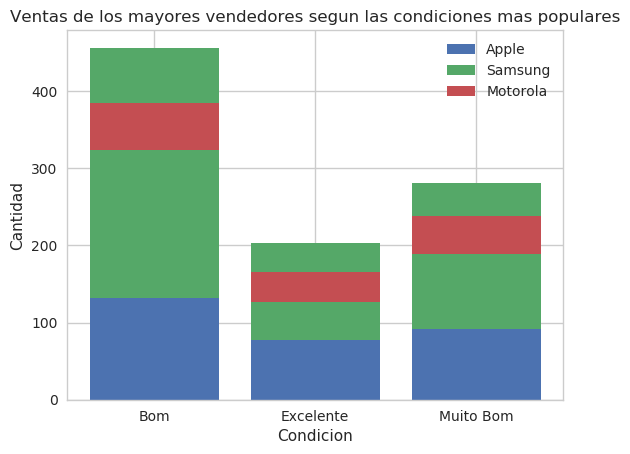

In [285]:
appleVentas=conv.loc[(conv['marca']=='Apple') & (conv['condition']!='Bom - Sem Touch ID'),'cantidad de conversiones'].values
samsungVentas=conv.loc[(conv['marca']=='Samsung') & (conv['condition']!='Novo'),'cantidad de conversiones'].values
motorolaVentas=conv.loc[conv['marca']=='Motorola','cantidad de conversiones'].values

g1=plt.bar(x=conv.loc[(conv['marca']=='Apple') & (conv['condition']!='Bom - Sem Touch ID'), 'condition'],height=appleVentas)
g2=plt.bar(x=conv.loc[(conv['marca']=='Samsung') & (conv['condition']!='Novo'),'condition'],height=samsungVentas, bottom=appleVentas)
g3=plt.bar(x=conv.loc[conv['marca']=='Motorola','condition'],height=motorolaVentas, bottom=samsungVentas)


plt.title('Ventas de los mayores vendedores segun las condiciones mas populares')
plt.xlabel('Condicion')
plt.ylabel('Cantidad')
plt.legend((g1[0],g2[0],g3[0]),('Apple','Samsung','Motorola'))


 # 6. Datos por sku

In [141]:
#Estudio del dataframe de acuerdo al identificador unico de cada producto
gb_sku=dataframe.groupby('sku')

In [180]:
gb_sku.agg({'event':'describe'})
gb_sku[['event']=='conversion'].sum()

KeyError: 'Column not found: False'